# 날씨데이터 EDA

kamis 데이터 확인 결과 2012년 8월에 80미리 이상 비가 내린 경우가 있었는데
이때 9월의 배추가격이 폭등했었다

- 주요 생산지
 - 봄배추 : 경기 평택/포천, 충북 청원, 충남 예산
 - 고랭지 배추 : 강원 강릉/태백/삼천/정선
 - 가을배추 : 충북 제천, 전북 고창, 전남 나주
 - 겨울배추 : 전남 해남/진도, 제주도

- 지점
    - 261 : 해남
    - 105 : 강릉
    - 216 : 태백
    - 217 : 정선
- 지점의 근거는 농수산데이터의 EDA를 기반으로 함   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic')

#경고 끄기
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 확인

In [2]:
df = pd.read_csv('20082018.csv')

In [170]:
df.isna().mean()

지점                     0.000000
일시                     0.000000
평균기온(°C)               0.001192
최저기온(°C)               0.000199
최저기온 시각(hhmi)          0.000199
최고기온(°C)               0.000066
최고기온 시각(hhmi)          0.000066
강수 계속시간(hr)            0.994637
10분 최다 강수량(mm)         0.764433
10분 최다강수량 시각(hhmi)     0.817532
1시간 최다강수량(mm)          0.764433
1시간 최다 강수량 시각(hhmi)    0.811772
일강수량(mm)               0.628046
최대 순간 풍속(m/s)          0.000662
최대 순간 풍속 풍향(16방위)      0.000662
최대 순간풍속 시각(hhmi)       0.000662
최대 풍속(m/s)             0.000662
최대 풍속 풍향(16방위)         0.000662
최대 풍속 시각(hhmi)         0.000662
평균 풍속(m/s)             0.000794
풍정합(100m)              0.000794
최다풍향(16방위)             0.003377
평균 이슬점온도(°C)           0.002251
최소 상대습도(%)             0.000265
최소 상대습도 시각(hhmi)       0.000265
평균 상대습도(%)             0.002251
평균 증기압(hPa)            0.002251
평균 현지기압(hPa)           0.001059
최고 해면기압(hPa)           0.000199
최고 해면기압 시각(hhmi)       0.000199
                         ...   
1시간 최다일사

In [3]:
print(df.columns)

Index(['지점', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조 시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사(MJ/m2)',
       '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)',
       '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온도(°C)',

### 쓸만한 컬럼 목록

- 기온, 일조량, 강수량, 풍속
- 기온관련
    - 평균기온(°C)
    - 최저기온(°C)
    - 최고기온(°C)
- 일조량
    - 합계 일조 시간(hr)
- 강수량
    - #강수 계속시간(hr) 없는것도 많아서 걍 뺌
    - 1시간 최다강수량(mm)
    - 일강수량(mm)
- 풍속
    - 최대 풍속(m/s)
    - 평균 풍속(m/s)

In [4]:
df.loc[(df['지점'] == 261),(
    '지점'
    ,'일시'
    ,'평균기온(°C)'
    ,'최저기온(°C)'
    ,'최고기온(°C)'
    ,'합계 일조 시간(hr)'
    ,'1시간 최다강수량(mm)'
    ,'일강수량(mm)'
    ,'최대 풍속(m/s)'
    ,'평균 풍속(m/s)'
)].head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),합계 일조 시간(hr),강수 계속시간(hr),1시간 최다강수량(mm),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
9991,261,2008-01-01,0.2,-1.5,2.3,3.4,NaN,NaN,0.5,7.0,4.1
9992,261,2008-01-02,2.4,0.0,4.3,0.9,NaN,NaN,NaN,5.6,3.0
9993,261,2008-01-03,2.2,-2.5,8.7,4.8,NaN,NaN,NaN,6.1,1.8
9994,261,2008-01-04,1.0,-4.6,7.8,8.9,NaN,NaN,NaN,4.7,1.4
9995,261,2008-01-05,1.5,-3.9,8.8,8.0,NaN,NaN,NaN,5.2,1.1


## 데이터 가공

In [47]:
df['yyyy'] = df['일시'].apply(lambda x: str(x)[0:4])
df['mm'] = df['일시'].apply(lambda x: str(x)[5:7])
df['dd'] = df['일시'].apply(lambda x: str(x)[8:10])
df['yyyymm'] = df['일시'].apply(lambda x: str(x)[0:4]+str(x)[5:7])
df['yyyy'] = df['yyyy'].apply(lambda x: int(x))
df['mm'] = df['mm'].apply(lambda x: int(x))
df['dd'] = df['dd'].apply(lambda x: int(x))
df['yyyymm'] = df['yyyymm'].apply(lambda x: int(x))
df = df.sort_values(["yyyymm"], ascending=[True])

In [6]:
df['일교차'] = df['최고기온(°C)'] - df['최저기온(°C)']

## EDA

### 온도확인

#### 최저기온

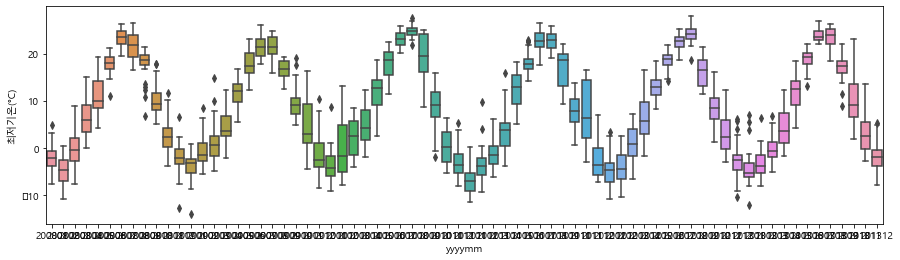

In [70]:
# 해남
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최저기온(°C)', data=df.loc[(df['지점'] == 261) & (df['yyyy'] < 2014)])

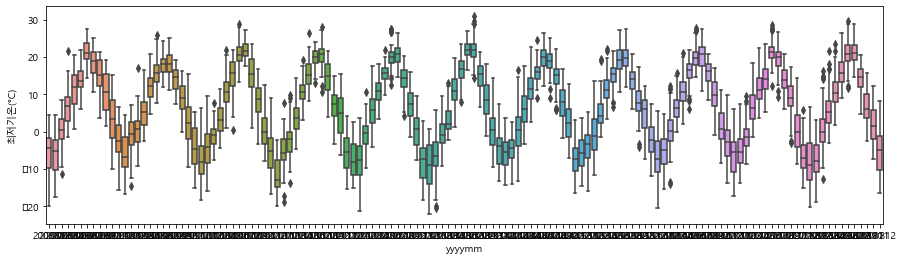

In [62]:
# 강원도 3지역 합침
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최저기온(°C)', data=df.loc[(df['지점'] == 105) | (df['지점'] == 216) | (df['지점'] == 217)])

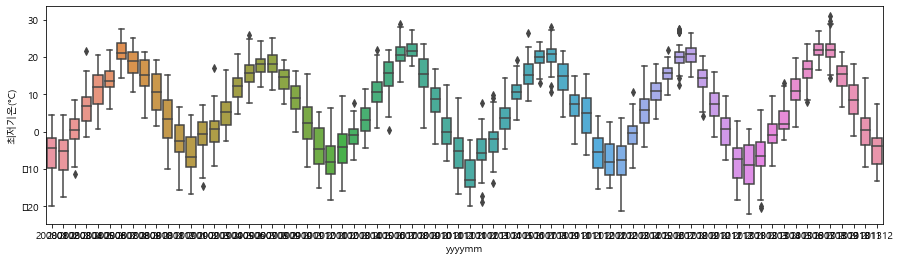

In [72]:
# 강원도 3지역 합침
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최저기온(°C)'
                  , data=df.loc[((df['지점'] == 105) | (df['지점'] == 216) | (df['지점'] == 217)) & (df['yyyy'] < 2014)])

#### 최고기온

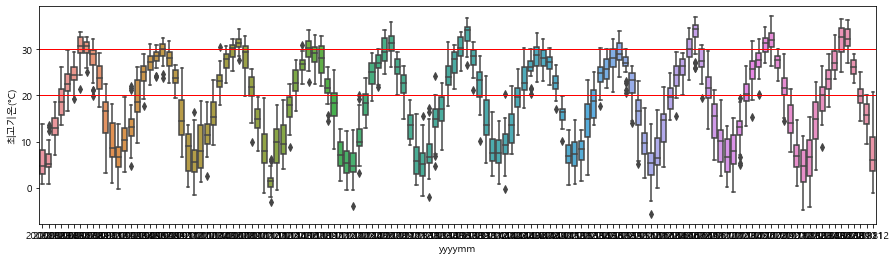

In [89]:
# 해남
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최고기온(°C)', data=df.loc[(df['지점'] == 261)])
plt.axhline(y=30, color='r', linewidth=1)
plt.axhline(y=20, color='r', linewidth=1)
plt.show()

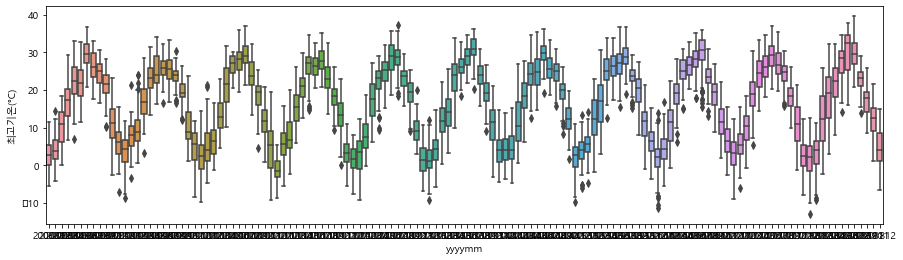

In [77]:
# 강원도 3지역 합침
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최고기온(°C)', data=df.loc[(df['지점'] == 105) | (df['지점'] == 216) | (df['지점'] == 217)])

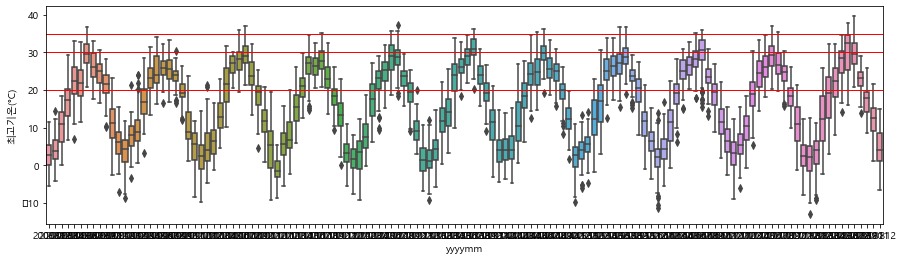

In [92]:
# 강원도 3지역 합침
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최고기온(°C)', data=df.loc[(df['지점'] == 105) | (df['지점'] == 216) | (df['지점'] == 217)])
plt.axhline(y=35, color='r', linewidth=1)
plt.axhline(y=30, color='r', linewidth=1)
plt.axhline(y=20, color='r', linewidth=1)

#### 평균온도

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131]), <a list of 132 Text xticklabel objects>)

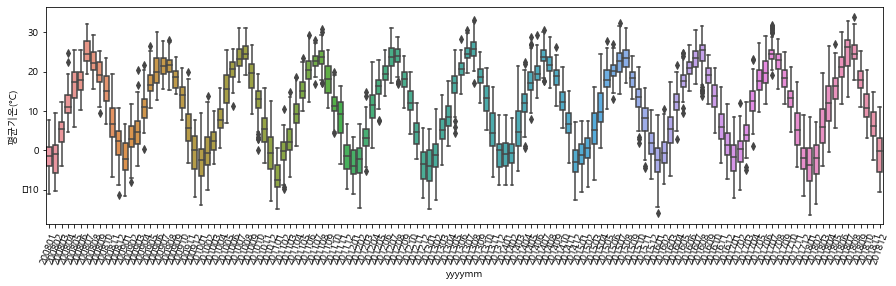

In [169]:
# 해남
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균기온(°C)', data=df.loc[(df['지점'] != 261)])
plt.xticks(rotation=70)

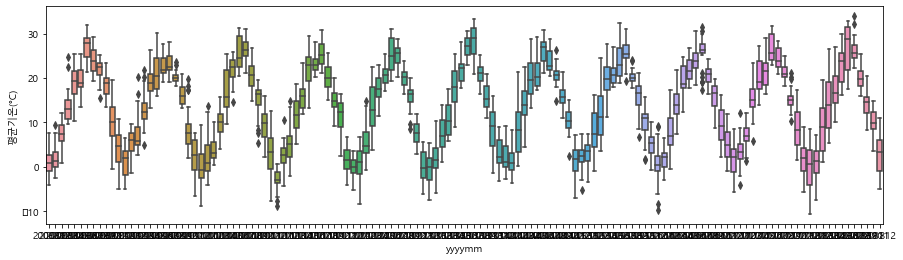

In [52]:
# 105 : 강릉
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균기온(°C)', data=df.loc[(df['지점'] == 105)])

In [ ]:
df.loc[(df['지점'] == 216)] & (df['yyyy'] < 2014))

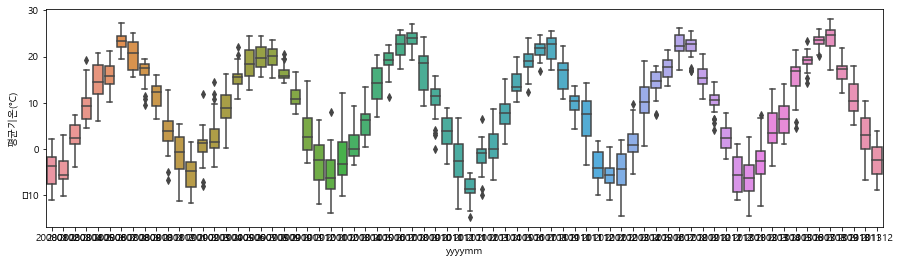

In [61]:
# 216 : 태백
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균기온(°C)', data=df.loc[(df['지점'] == 216) & (df['yyyy'] < 2014)])

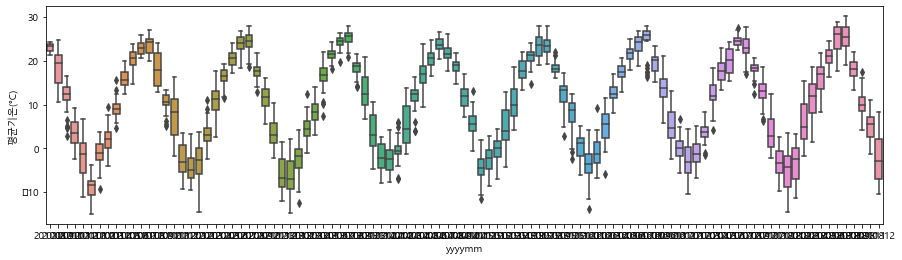

In [54]:
# 217 : 정선
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균기온(°C)', data=df.loc[(df['지점'] == 217)])

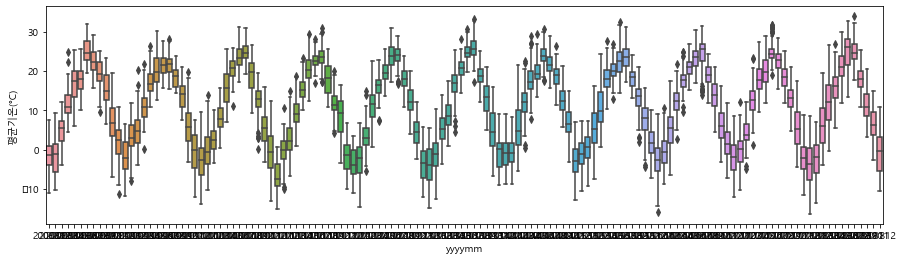

In [87]:
# 강원도 3지역 합침
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균기온(°C)', data=df.loc[(df['지점'] == 105) | (df['지점'] == 216) | (df['지점'] == 217)])

#### 일교차

### 일조량

### 강수량

- 1시간 최다강수량(mm)
- 일강수량(mm)

- 폭우
    - 시간당 7.6㎜ 이상 내리는 비


- 호우
    - 주의보 : 3시간 강우량이 60mm이상 예상되거나 12시간 강우량이 110mm이상
    - 경보 : 3시간 강우량이 90mm이상 예상되거나 12시간 강우량이 180mm이상

#### 1시간 최다 강수량(mm)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text xticklabel objects>)

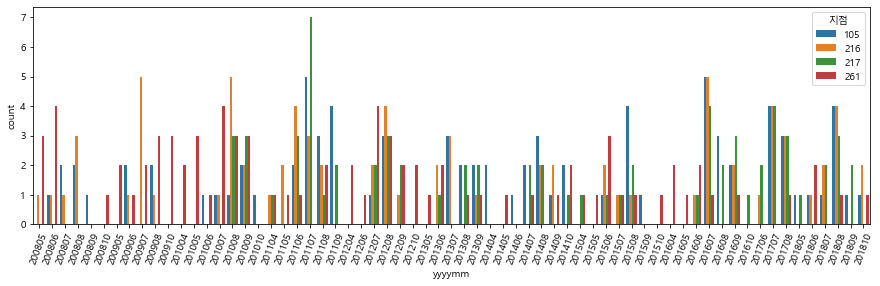

In [155]:
# 전체
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.countplot(x='yyyymm', hue="지점", data=df.loc[(10 <= df['1시간 최다강수량(mm)']) & (df['1시간 최다강수량(mm)'] <= 20)])
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

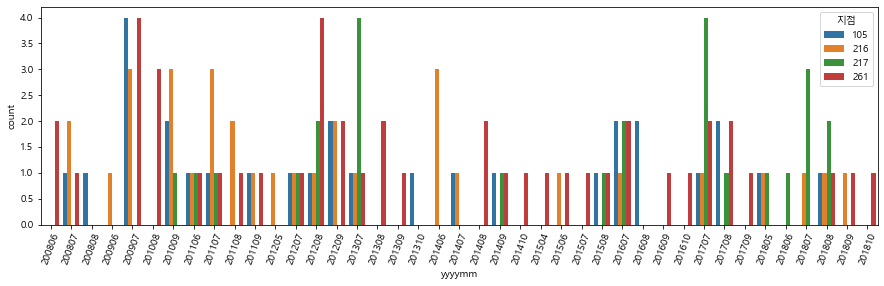

In [154]:
# 전체
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.countplot(x='yyyymm', hue="지점", data=df.loc[(20 <= df['1시간 최다강수량(mm)']) & (df['1시간 최다강수량(mm)'] <= 40)])
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

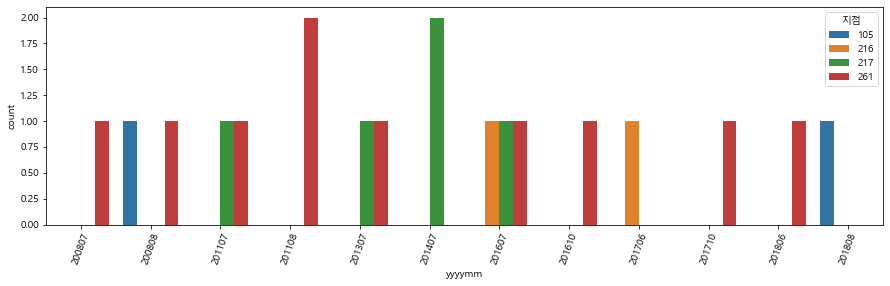

In [151]:
# 전체
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.countplot(x='yyyymm', hue="지점", data=df.loc[(40 <= df['1시간 최다강수량(mm)'])])
plt.xticks(rotation=70)

#### 일강수량(mm)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130]), <a list of 131 Text xticklabel objects>)

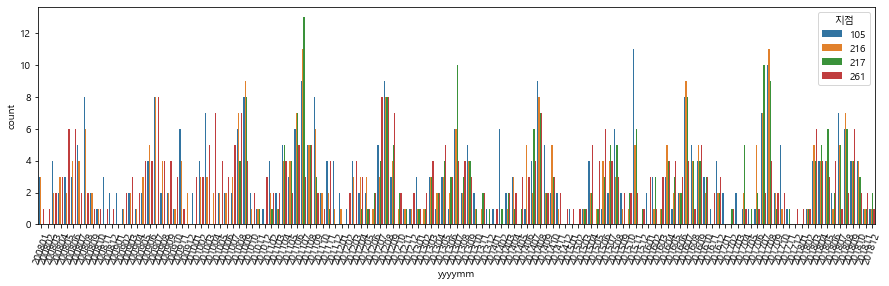

In [168]:
# 전체
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.countplot(x='yyyymm', hue="지점", data=df.loc[(10 <= df['일강수량(mm)']) & (0 != df['일강수량(mm)'])])
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

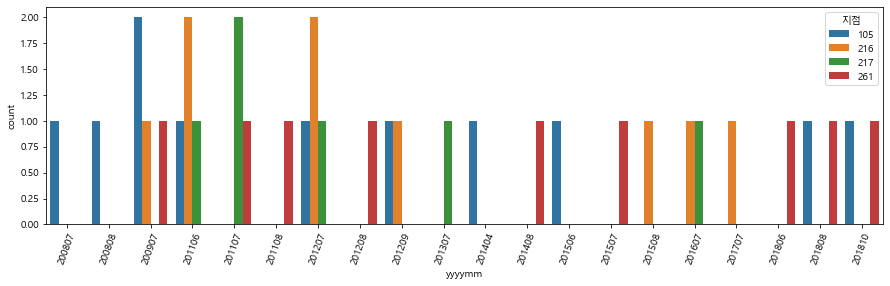

In [148]:
# 전체
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.countplot(x='yyyymm', hue="지점", data=df.loc[(110 <= df['일강수량(mm)'])])
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

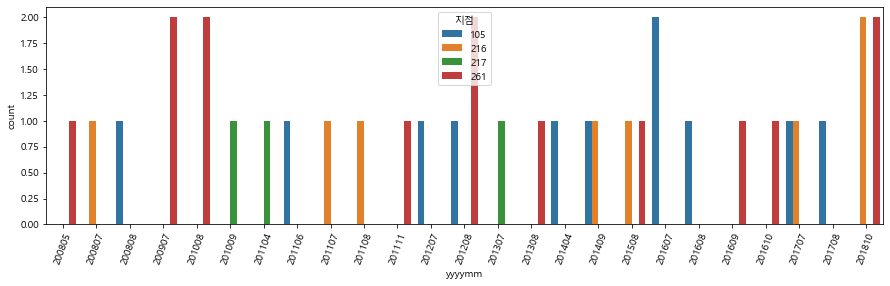

In [134]:
# 전체
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.countplot(x='yyyymm', hue="지점", data=df.loc[(90 <= df['일강수량(mm)']) & (df['일강수량(mm)'] <= 120)])
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

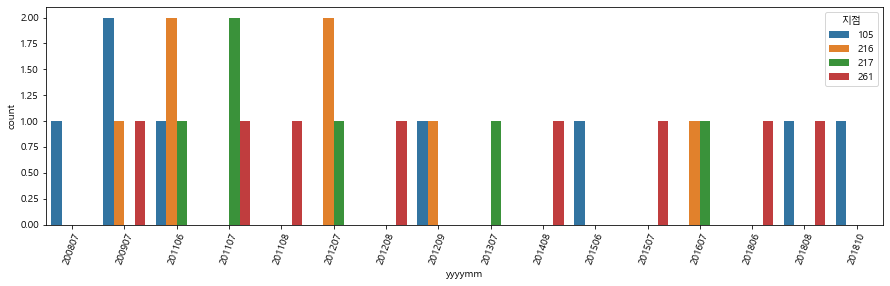

In [133]:
# 전체
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.countplot(x='yyyymm', hue="지점", data=df.loc[(120 <= df['일강수량(mm)'])])
plt.xticks(rotation=70)

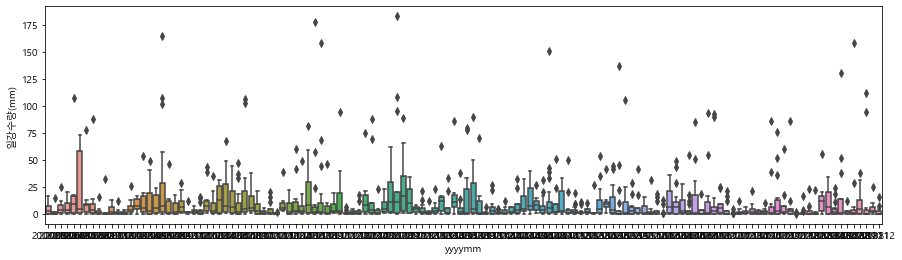

In [7]:
# 해남
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='일강수량(mm)', data=df.loc[(df['지점'] == 261)])

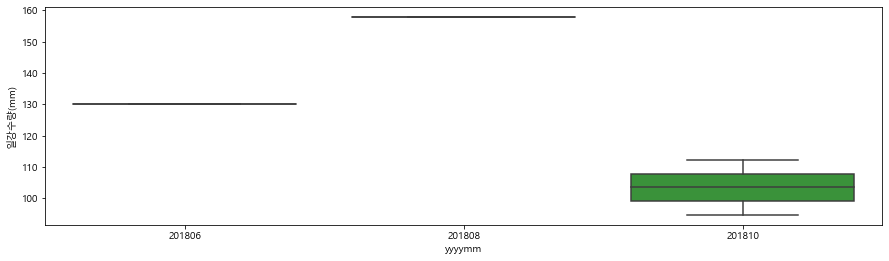

In [75]:
# 해남
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='일강수량(mm)',
                  data=df.loc[(df['지점'] == 261) & (df['일강수량(mm)'] > 60) & (df['yyyy'] > 2017)])

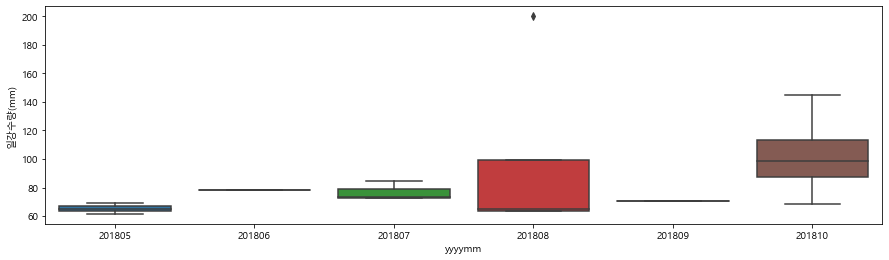

In [74]:
# 강원도 3지역 합침
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='일강수량(mm)',
                  data=df.loc[((df['지점'] == 105) | (df['지점'] == 216) | (df['지점'] == 217)) & (df['일강수량(mm)'] > 60) & (df['yyyy'] > 2017)])

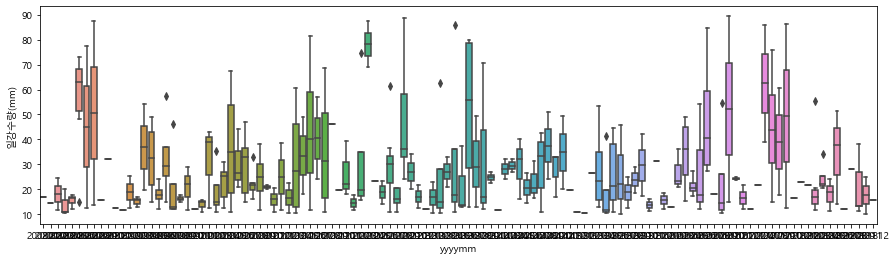

In [39]:
# 해남
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='일강수량(mm)'
                  , data=df.loc[(df['지점'] == 261) & (df['일강수량(mm)'] > 10) & (df['일강수량(mm)'] < 90)
                                ,('yyyymm','일강수량(mm)')])

In [102]:
df.loc[(df['지점'] == 261) 
       & (df['일강수량(mm)'] > 100)
       #& (df['1시간 최다강수량(mm)'] < 20)
       , 
    ('1시간 최다강수량(mm)'
    ,'일강수량(mm)')]

,강수 계속시간(hr),1시간 최다강수량(mm),일강수량(mm)
10139,NaN,19.5,107.0
10552,NaN,38.5,164.5
10544,NaN,33.5,107.0
10548,NaN,31.0,101.5
10943,NaN,24.5,106.5
10961,NaN,21.0,103.0
11276,NaN,41.5,178.0
11305,NaN,42.5,158.0
11688,NaN,26.5,108.0
11692,NaN,32.5,183.0


### 풍속

- 태풍
    - 강풍(또는 풍랑) 경보 기준에 도달할 것으로 예상될 때 
    - 총 강우량이 200mm이상 예상될 때
- 강풍
- 주의보
    - 육상에서 풍속 14m/s 이상 또는 순간풍속 20m/s 이상이 예상될 때
    - 다만, 산지는 풍속 17m/s 이상 또는 순간풍속 25m/s 이상이 예상될 때
- 경보
    - 육상에서 풍속 21m/s 이상 또는 순간풍속 26m/s 이상이 예상될 때
    - 다만, 산지는 풍속 24m/s 이상 또는 순간풍속 30m/s 이상이 예상될 때

#### 최대풍속

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

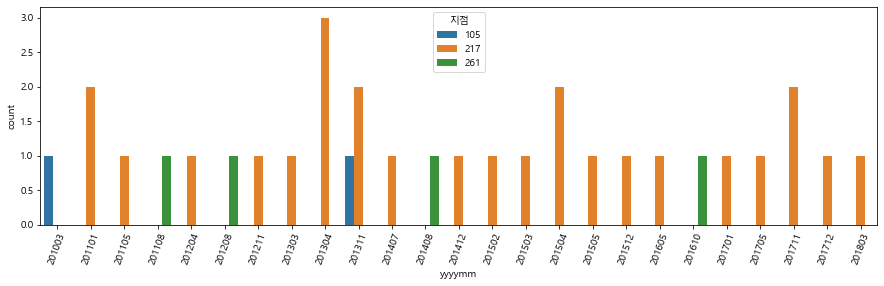

In [162]:
# 전체
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.countplot(x='yyyymm', hue="지점", data=df.loc[(14 < df['최대 풍속(m/s)'])])
plt.xticks(rotation=70)

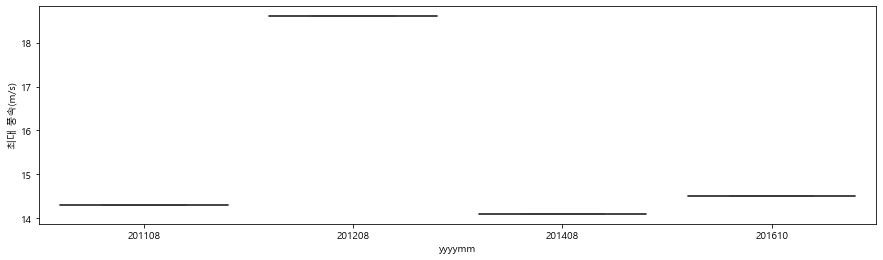

In [93]:
# 261 해남
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최대 풍속(m/s)', data=df.loc[(df['지점'] == 261) & (df['최대 풍속(m/s)'] > 14)])

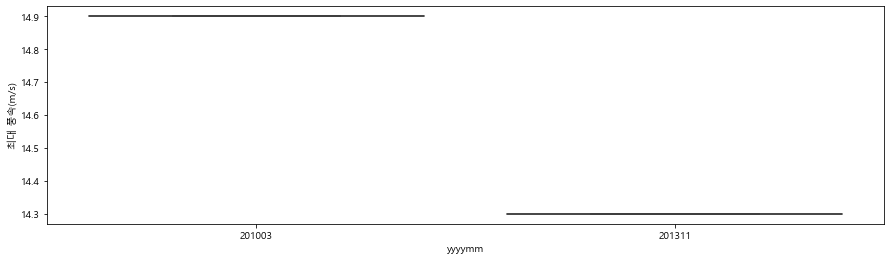

In [96]:
# 105 : 강릉
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최대 풍속(m/s)', data=df.loc[(df['지점'] == 105) & (df['최대 풍속(m/s)'] > 14)])

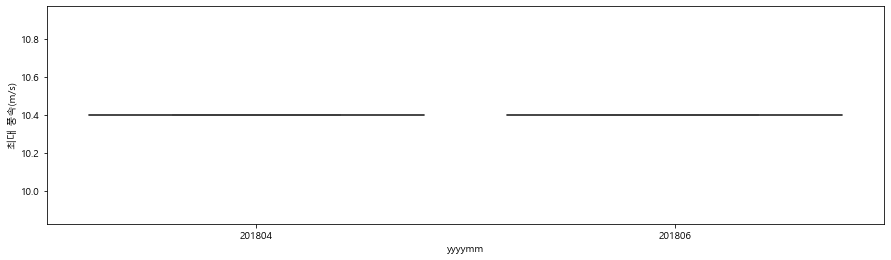

In [100]:
# 216 : 태백
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최대 풍속(m/s)', data=df.loc[(df['지점'] == 216) & (df['최대 풍속(m/s)'] > 10)])

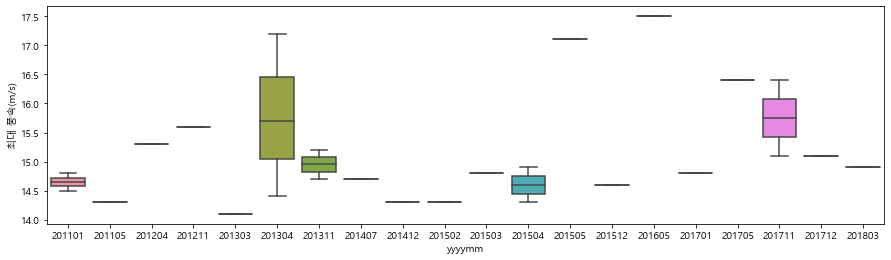

In [101]:
# 217 : 정선
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최대 풍속(m/s)', data=df.loc[(df['지점'] == 217) & (df['최대 풍속(m/s)'] > 14)])

In [ ]:
# 강원도 3지역 합침
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최대 풍속(m/s)', data=df.loc[(df['지점'] == 105) | (df['지점'] == 216) | (df['지점'] == 217) & (df['최대 풍속(m/s)'] > 14)])

#### 평균풍속

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text xticklabel objects>)

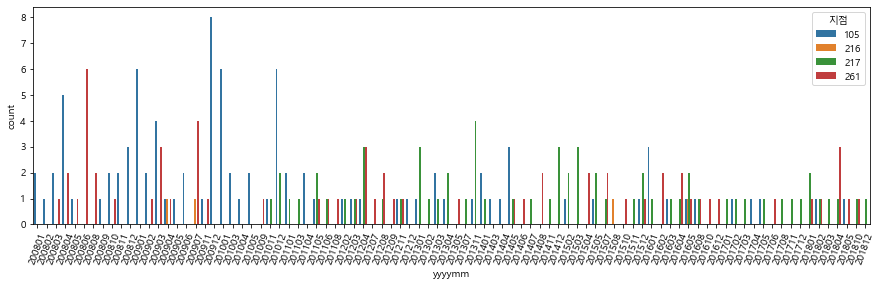

In [117]:
# 전체
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.countplot(x='yyyymm', hue="지점", data=df.loc[(df['평균 풍속(m/s)'] > 5)])
plt.xticks(rotation=70)

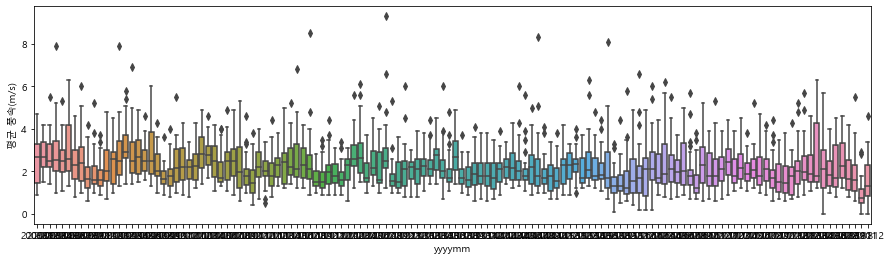

In [81]:
# 261 해남
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균 풍속(m/s)', data=df.loc[(df['지점'] == 261)])

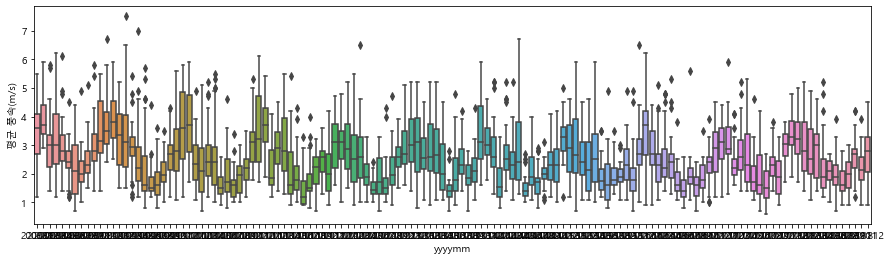

In [82]:
# 105 : 강릉
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균 풍속(m/s)', data=df.loc[(df['지점'] == 105)])

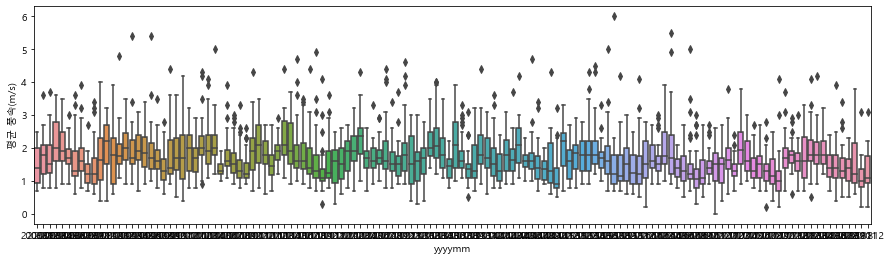

In [83]:
# 216 : 태백
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균 풍속(m/s)', data=df.loc[(df['지점'] == 216)])

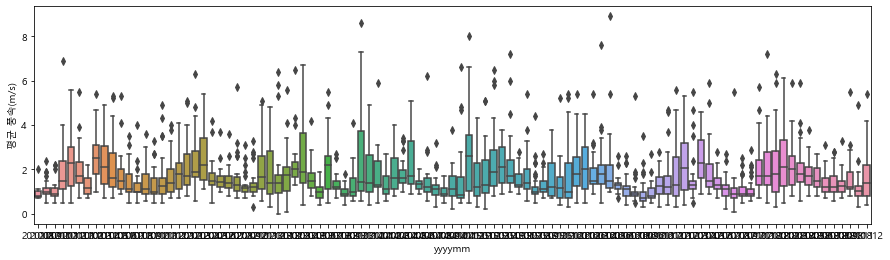

In [84]:
# 217 : 정선
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균 풍속(m/s)', data=df.loc[(df['지점'] == 217)])

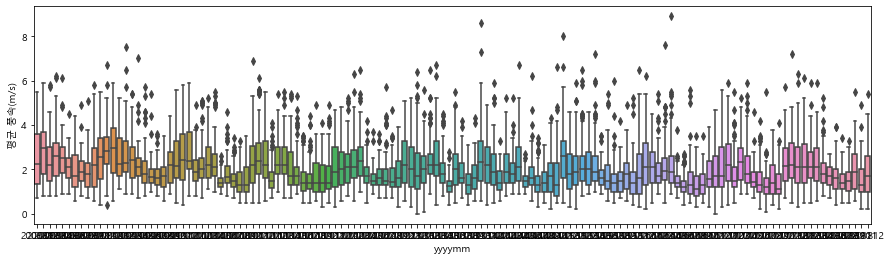

In [85]:
# 강원도 3지역 합침
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균 풍속(m/s)', data=df.loc[(df['지점'] == 105) | (df['지점'] == 216) | (df['지점'] == 217)])